###  Analysis and Prediction of Food Delivery Time 

The objective of the project is to build a machine learning model that can predict food order delivery time . 
Delivery time on food orders can be affected by several factors and we will see what factors contributed more to an order being delivered quicker.

In order to show transparency and accountability,food and other delivery companies need to show the exact time to their customers how long it takes for an order to be delivered. That is where using predictive models comes into effect.
To predict the delivery time, distance between the restaurant and the customer address was calculated as well as some other facors were considered.

#### 1. Import packages and libraries

In [1]:

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

from sklearn.ensemble import RandomForestClassifier


# For metrics and helpful functions
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings("ignore")


#### Import the dataset

The dataset for this project is available [here](https://www.kaggle.com/datasets/gauravmalik26/food-delivery-dataset?select=train.csv)

In [2]:
data=pd.read_csv('Food_delivery.csv')

In [3]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

#### 2. Data cleaning and Explanatory Data Analysis

##### Duplicates

Check for duplicate entries 

In [5]:
print('Number of duplicates in the dataset: ' ,str(len(data[data.duplicated()==True]))) 

Number of duplicates in the dataset:  0


There was no duplicatwes in thes dataset.

##### Rename and change data type

We can see that our outcome variable 'Time_taken(min)' is object data taype and need to be corrected.Let's take a closer look at the column

In [6]:
data['Time_taken(min)'].unique()

array(['(min) 24', '(min) 33', '(min) 26', '(min) 21', '(min) 30',
       '(min) 40', '(min) 32', '(min) 34', '(min) 46', '(min) 23',
       '(min) 20', '(min) 41', '(min) 15', '(min) 36', '(min) 39',
       '(min) 18', '(min) 38', '(min) 47', '(min) 12', '(min) 22',
       '(min) 25', '(min) 35', '(min) 10', '(min) 19', '(min) 11',
       '(min) 28', '(min) 52', '(min) 16', '(min) 27', '(min) 49',
       '(min) 17', '(min) 14', '(min) 37', '(min) 44', '(min) 42',
       '(min) 31', '(min) 13', '(min) 29', '(min) 50', '(min) 43',
       '(min) 48', '(min) 54', '(min) 53', '(min) 45', '(min) 51'],
      dtype=object)

We need to remove min and check again and rename the column as 'delivery_time'. In order to do that, we need to create a function that splits the values

In [7]:
def split_fn(x):
    return x.split(' ')[1].strip()

In [8]:
data['delivery_time']=data['Time_taken(min)'].apply(split_fn).astype(int)
data['delivery_time'].unique()

array([24, 33, 26, 21, 30, 40, 32, 34, 46, 23, 20, 41, 15, 36, 39, 18, 38,
       47, 12, 22, 25, 35, 10, 19, 11, 28, 52, 16, 27, 49, 17, 14, 37, 44,
       42, 31, 13, 29, 50, 43, 48, 54, 53, 45, 51])

In [9]:
data.drop(columns=['Time_taken(min)'],axis=1,inplace=True)

In [10]:
data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'delivery_time'],
      dtype='object')

Now let's examine variables that we are interested in, and create plots to visualize relationships between variables

##### Outliers

Checking for possible outliers. Outliers can affect performances in some machine learning models. Depending on the prediction model used later, we have to either keep  or remove these values. 

In [95]:
def check_outlier(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    outliers=df[(df<lower_limit)|(df>upper_limit)]
    return outliers

In [96]:
print('Number of outliers in the delivery time column is: ' ,len(check_outlier(data['delivery_time'])))

Number of outliers in the delivery time column is:  270


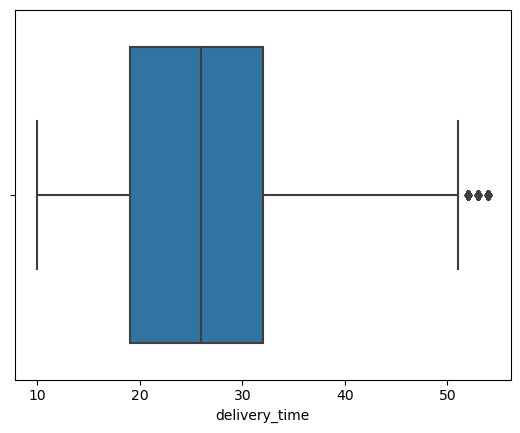

In [13]:
sns.boxplot(data=data,x='delivery_time')
plt.show()

In [14]:
data['Weatherconditions'].unique()

array(['conditions Sunny', 'conditions Stormy', 'conditions Sandstorms',
       'conditions Cloudy', 'conditions Fog', 'conditions Windy',
       'conditions NaN'], dtype=object)

In [15]:
data.groupby(['Weatherconditions'])[['delivery_time']].agg([np.median,np.mean])

delivery_time           
                             median       mean
Weatherconditions                             
conditions Cloudy              28.0  28.917330
conditions Fog                 28.0  28.916122
conditions NaN                 26.0  26.545455
conditions Sandstorms          26.0  25.875517
conditions Stormy              26.0  25.870815
conditions Sunny               20.0  21.856947
conditions Windy               26.0  26.118836

As expected average delivery time is much shorter during sunny conditions while During Fog and cloudy condition, drivers take longer time to deliver the orders.

conditions NaN needs to be investigated deeper

In [16]:
#remove the string conditions in the column
data['Weatherconditions']=data['Weatherconditions'].str.replace('conditions ','')
data['Weatherconditions'].replace('NaN',np.nan,inplace=True)

In [17]:
data['Weatherconditions'].unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', nan],
      dtype=object)

replace 'NaN' with null values and we will deal with the missing values later

In [18]:
data['Weatherconditions'].replace('NaN',np.nan,inplace=True)

In [19]:
data['Weatherconditions'].isna().sum()

616

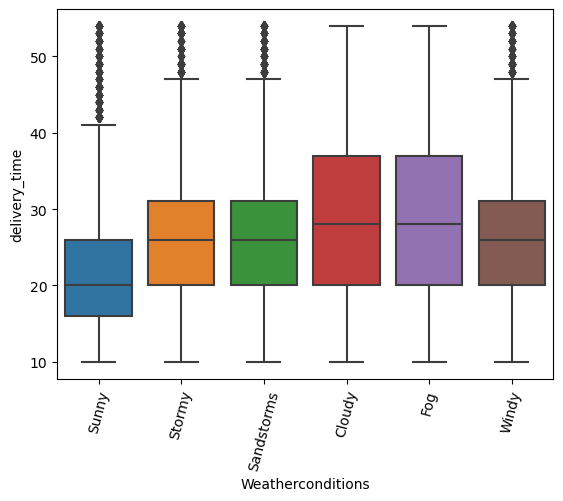

In [20]:
sns.boxplot(data=data,x='Weatherconditions',y='delivery_time')
plt.xticks(rotation=75)
plt.show();

There could be more NaN values in other columns as well that should be replaced with missing values

In [21]:
data.replace(['NaN','NaN '],np.nan,inplace=True)

In [22]:
data.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
delivery_time                     0
dtype: int64

#### Missing Values

Missing values should be handled. Many Algorithms do not support data with missing values. There are different ways of handling missing values
- delete the missing values
- impute values

There are a number of ways where we can impute missing values.
If the column is categorical, we can replace it with the most frequent category (the mode). If the column with missing values is a numerical variable, we can use either the mean or median value inplace of the missing ones.

In [23]:
numerical_columns=['Delivery_person_Age','Delivery_person_Ratings']
categorical_columns=['City','Festival','multiple_deliveries','Road_traffic_density','Weatherconditions']

In [24]:
data[categorical_columns].isna().sum()

City                    1200
Festival                 228
multiple_deliveries      993
Road_traffic_density     601
Weatherconditions        616
dtype: int64

In [25]:
data[numerical_columns].isna().sum()

Delivery_person_Age        1854
Delivery_person_Ratings    1908
dtype: int64

We use iterative and simple imputer technique to transfotm missing values in the numerical and categorical columns respectively.

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

The IterativeImputer algorithm will consider all of the columns in making value estimation where as in SimpleImputer the missing value can only be calculated from the same feature.

In [27]:
imp_numerical = IterativeImputer(max_iter=10, random_state=0)
data[numerical_columns] = imp_numerical.fit_transform(data[numerical_columns])
data[numerical_columns].isna().sum()

Delivery_person_Age        0
Delivery_person_Ratings    0
dtype: int64

For categorical columns, it is possible to use simple imputer technique using the most frequent catergory to replace the missing values

In [28]:
imp_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

for variable in categorical_columns:
    data[variable] = imp_categorical.fit_transform(data[variable].to_numpy().reshape(-1,1))

In [29]:
data[categorical_columns].isna().sum()

City                    0
Festival                0
multiple_deliveries     0
Road_traffic_density    0
Weatherconditions       0
dtype: int64

#### 3. Feature Engineering

We can create a new distance column that represents the distance between the restaurant location and the pick up location. In the dataset we have information on the latitude and longitude location of both the restaurant as well as the delivery address location.  
In order to do that, Haversine formula was used. HAversine formula calculates distance between two points using the latitude and longitude of the two points.
Formula for calculating distance is as follows:

a = sin²(φB - φA/2) + cos φA * cos φB * sin²(λB - λA/2)

c = 2 * atan2( √a, √(1−a) )

d = R * c

In [30]:
# Set the earth's radius (in kilometers)
R = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)

# We create a function that calculates the distance between two points using the haversine formula
def dist_calculator(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c
  
# Calculate the distance between each pair of points
data['distance'] = np.nan

for i in range(len(data)):
    data.loc[i, 'distance'] = dist_calculator(data.loc[i, 'Restaurant_latitude'], 
                                        data.loc[i, 'Restaurant_longitude'], 
                                        data.loc[i, 'Delivery_location_latitude'], 
                                        data.loc[i, 'Delivery_location_longitude'])

In [31]:
data['distance'].describe()

count    45593.000000
mean        99.303911
std       1099.731281
min          1.465067
25%          4.663493
50%          9.264281
75%         13.763977
max      19692.674606
Name: distance, dtype: float64

The mean is significantly better than the median hence skewed to the right and presence of outliers. We can see that using a distribution plot.

<Axes: xlabel='distance', ylabel='Density'>

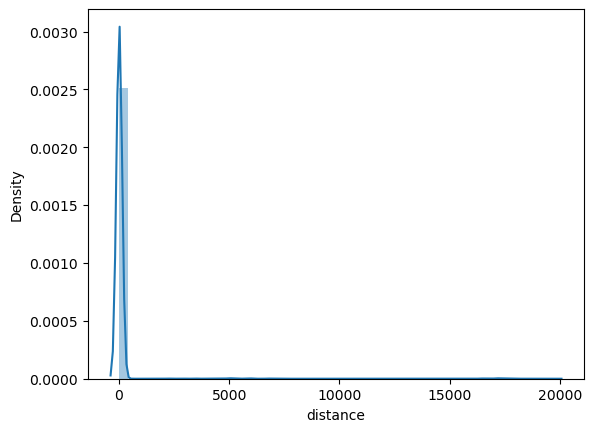

In [32]:
sns.distplot(data['distance'])

Let's check the number of outliers in our numerical columns and the newly created distance variable using our 'check_outlier' function

In [94]:
outlier_distance = check_outlier(data['distance'])
outlier_ratings = check_outlier(data['Delivery_person_Ratings'])
outlier_age = check_outlier(data['Delivery_person_Age'])
outlier_time = check_outlier(data['delivery_time'])

print('The number of outliers in the distance column : ' +str(len(outlier_distance)))
print('The number of outliers in the Driver Ratings column : ' +str(len(outlier_ratings)))
print('The number of outliers in the Driver Age column : ' +str(len(outlier_age)))
print('The number of outliers in the delivery time column : ' +str(len(outlier_time)))

The number of outliers in the distance column : 431
The number of outliers in the Driver Ratings column : 5345
The number of outliers in the Driver Age column : 53
The number of outliers in the delivery time column : 270


##### 3.1 Feature Selection

Remove some irrelavant variables from the dataset so that we get a much improved model performance.

In [35]:
data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'delivery_time', 'distance'],
      dtype='object')

In [36]:
data_final=data.copy()
data_final=data_final.drop(columns=['ID', 'Delivery_person_ID','Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked'],axis=1)

In [37]:
data_final.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,delivery_time,distance
0,37.0,4.9,Sunny,High,2,Snack,motorcycle,0,No,Urban,24,3.025149
1,34.0,4.5,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,20.183530
2,23.0,4.4,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,1.552758
3,38.0,4.7,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,7.790401
4,32.0,4.6,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,6.210138


#### 4. Explanatory Data Analysis (continued)

In [38]:
data_final.groupby(['Type_of_vehicle'])[['delivery_time']].agg([np.median,np.mean])

delivery_time           
                         median       mean
Type_of_vehicle                           
bicycle                    26.0  26.426471
electric_scooter           24.0  24.470110
motorcycle                 26.0  27.605674
scooter                    24.0  24.480754

After performing a hypothesis testing using one way anova, There was significant difference on average delivery time among the different delivery types and that difference was not due to chance.

In [1]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'delivery_time ~ Type_of_vehicle'

model = ols(formula, data=data).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

NameError: name 'data' is not defined

In [40]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_oneway = pairwise_tukeyhsd(endog = data["delivery_time"], groups = data["Type_of_vehicle"])

# Display the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
bicycle,electric_scooter,-1.9564,0.3093,-4.8659,0.9531,False
bicycle,motorcycle,1.1792,0.7204,-1.7084,4.0668,False
bicycle,scooter,-1.9457,0.3083,-4.836,0.9446,False
electric_scooter,motorcycle,3.1356,0.0,2.7236,3.5475,True
electric_scooter,scooter,0.0106,0.9999,-0.4198,0.4411,False
motorcycle,scooter,-3.1249,0.0,-3.3666,-2.8832,True


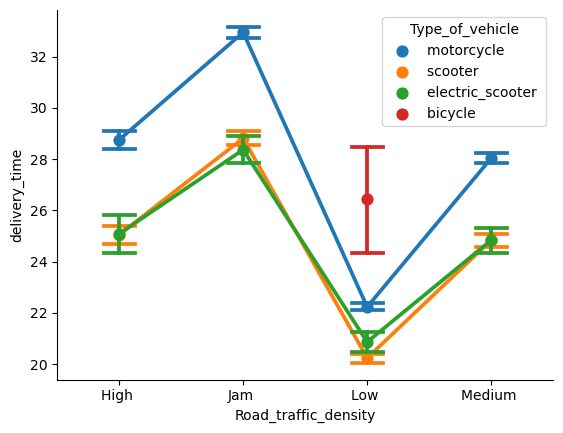

In [41]:
fig = sns.pointplot(x='Road_traffic_density', y = 'delivery_time', hue='Type_of_vehicle',data = data,capsize=0.25)
sns.despine()

Delivery time on scooters and electic scooter in particular were shorter compared to motor cycle and bicycle. 
The difference is particularly significant between scooters and motorcycle as well as electric scooters and motorcycle.
Hiring more  ndrivers with  scooters and electric scooters during high and jam road trafic density time could be a very good measure as the use of motorcycle during these trafic density time resulted in longer delivery period.

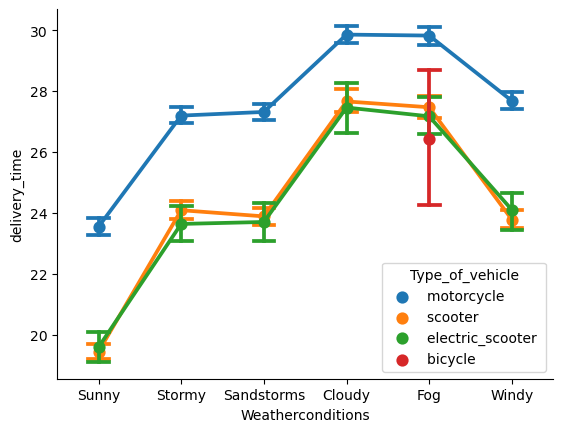

In [42]:
fig = sns.pointplot(x='Weatherconditions', y = 'delivery_time', hue='Type_of_vehicle',data = data,capsize=0.25)
sns.despine()

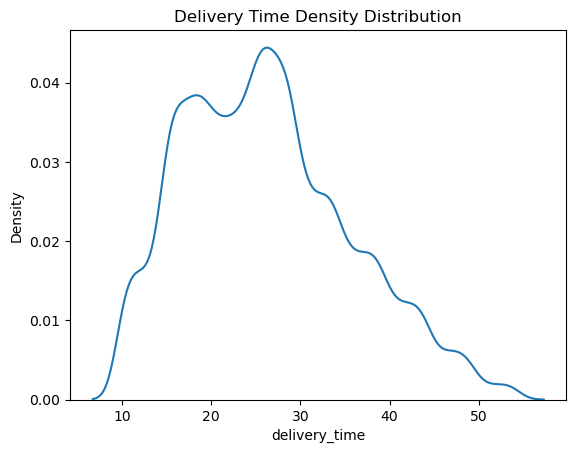

In [43]:
sns.kdeplot(data=data_final,x='delivery_time')
plt.title('Delivery Time Density Distribution')
plt.show;

The density distribution plot shows that there were higher number of deliverues between 25 to 30 minutes after an order is made.

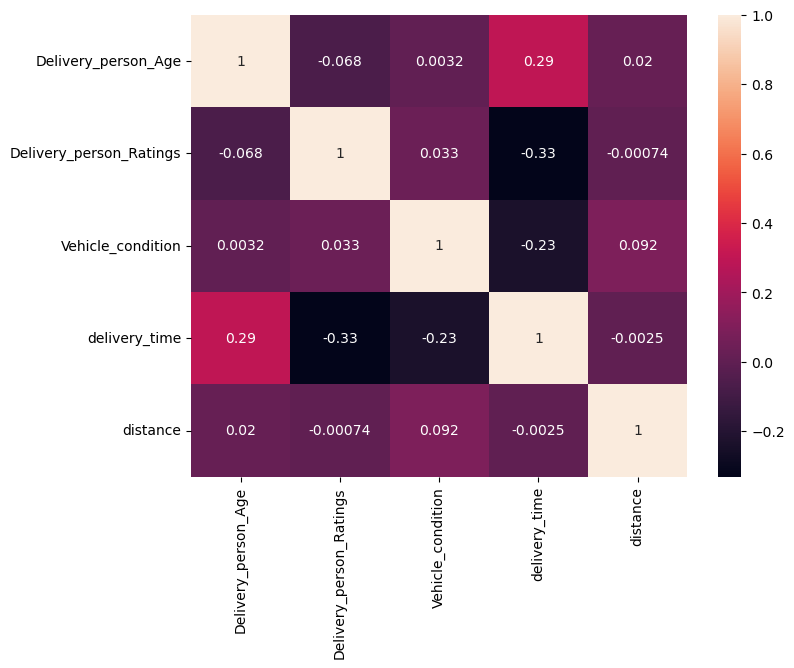

In [44]:
#create a correlationmatrix to see how correlated are each predictors
corrMatrix = data_final.corr(numeric_only=True)
plt.subplots(figsize=(8,6))
sns.heatmap(corrMatrix, annot=True)
plt.show()

Let's see the Relationship between some features.

In [45]:
import plotly.io as pio
pio.renderers.default = "png"

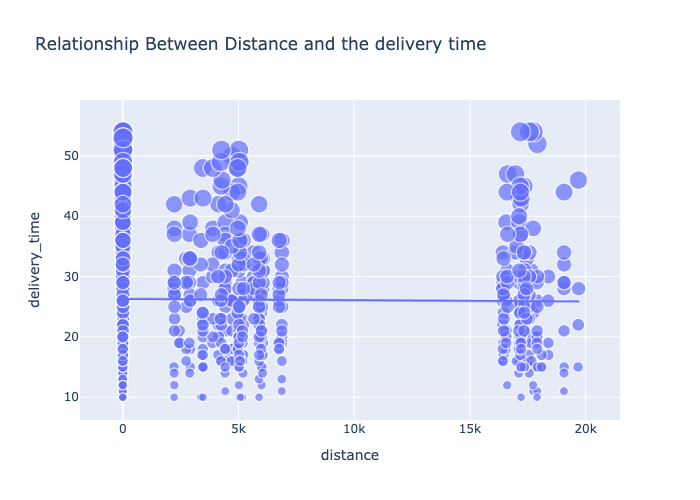

In [46]:
figure = px.scatter(data_frame = data_final, 
                    x='distance',
                    y='delivery_time', 
                    size='delivery_time', 
                    trendline="ols", 
                    title = "Relationship Between Distance and the delivery time")
figure.show('png');

Regardless of the distance between the restaurant and the pick up location, the drivers deliver the order between 20-30 minutes

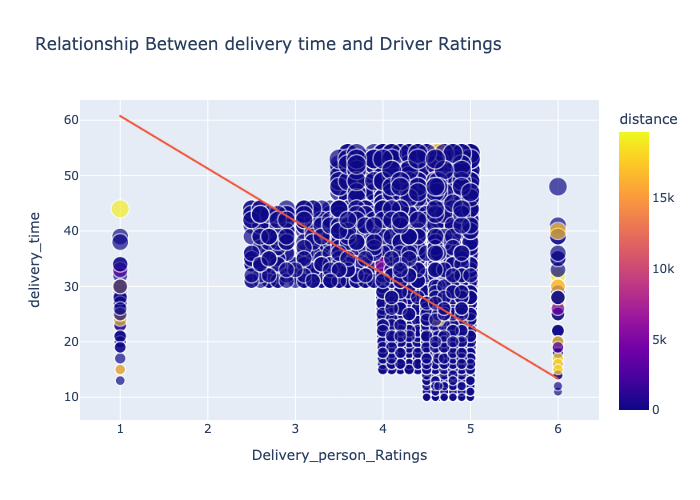

In [47]:
figure = px.scatter(data_frame = data_final, 
                    x='Delivery_person_Ratings',
                    y='delivery_time', 
                    size='delivery_time', 
                    color = "distance",
                    trendline="ols", 
                    title = "Relationship Between delivery time and Driver Ratings")
figure.show();

THere is an inverse relationship between the drivers ratings and the delivery time. The highest rated drivers deliver much quicker than those drivers with a low rating scores.

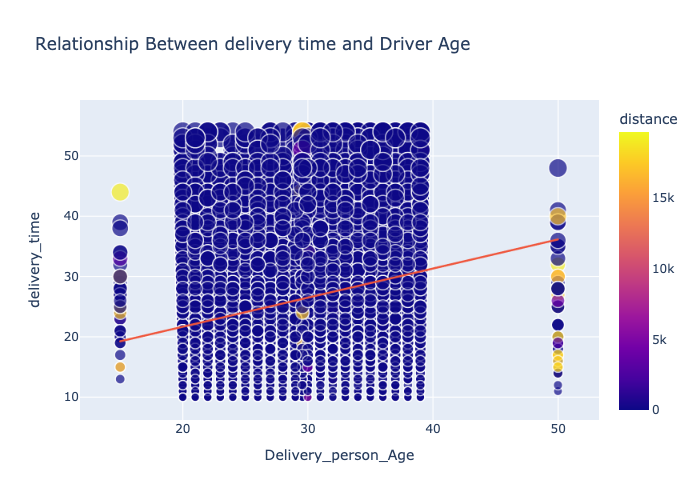

In [48]:
figure = px.scatter(data_frame = data_final, 
                    x='Delivery_person_Age',
                    y='delivery_time', 
                    size='delivery_time', 
                    color = "distance",
                    trendline="ols", 
                    title = "Relationship Between delivery time and Driver Age")
figure.show();

There is a linear relationship between age of the driver and the delivery time it take. That means Younger drivers on average take fewer minutes to deliver than older drivers.

#### 5. Data Pre-Processing and Feature Transformation

Now it is time for data pre-processing before building a machine learning model. Most machine learning algorithms can not work with categorical data. We need to transform the categorical columns in the dataset to numeric data.

In [49]:
data_final.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Weatherconditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'delivery_time', 'distance'],
      dtype='object')

In [50]:
num_columns=['Delivery_person_Age','Delivery_person_Ratings','distance']
cat_columns=['Weatherconditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City']
outcome_variable=['delivery_time']

In [51]:
from sklearn.preprocessing import LabelEncoder
label_encoding = LabelEncoder()

for category in cat_columns:
    data_final[category] = label_encoding.fit_transform(data_final[category])

X = data_final[num_columns + cat_columns]
y = data_final[outcome_variable]

In [52]:
data_final.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,delivery_time,distance
0,37.0,4.9,4,0,2,3,2,0,0,2,24,3.025149
1,34.0,4.5,3,1,2,3,3,1,0,0,33,20.183530
2,23.0,4.4,2,2,0,1,2,1,0,2,26,1.552758
3,38.0,4.7,4,3,0,0,2,1,0,0,21,7.790401
4,32.0,4.6,0,0,1,3,3,1,0,0,30,6.210138


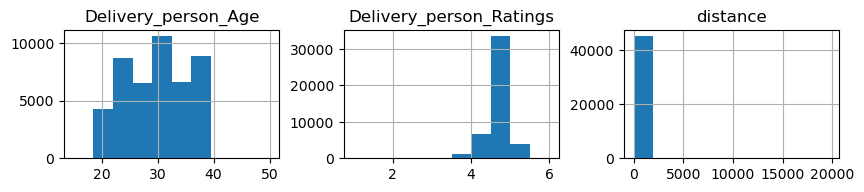

In [53]:
data_final[num_columns].hist(layout=(3,3), figsize=(10,6))
plt.show()

We have to use normalization such as MinMaxScalar or StandardScaler technique to normalize the distributions of these features. Normalization using Scikitlearn StandardScaler will be performed in the next section when building the model.

#### 6. Model Building

Split the dataset in to trainning and testing dataset using train_test_split function

Two of the most popular algorithms for predicting numerical values are linear regression and random forest regression. Linear regression models outcome variables as a linear combination of predictor variables. In comparison, Random Forest Regression builds multiple random forest decision trees, which generate aggregated or averaged predictions.

Linear Regression have four assumptions about the relationship between the independent and dependent variables. These assumptions include independent observations,linear relationship between the predictors and the mean of the outcome variable,constant variance (homoscedasticity), normality of errors, etc.
On the other hand, Random Forest Regression does not make any assumption about the underlying data distribution and can handle nonlinear relationships better. Moreover, it is less prone to overfitting due to its ability to randomly select different subsets of the data to train on and average out its results.

Random Forest Regression is preferred over linear regression when predicting numerical values because it offers greater accuracy and prediction stability.
Since we have outliers in the data , a tree based model that can handle outliers would be perfect choice. Of the tree-based models, random forest will be used here.

Let's train a machine learning model using Random forest and XGB regression model

In [54]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=0.2, random_state=42)

from sklearn import preprocessing

scaler=preprocessing.StandardScaler()

Xtrain = pd.DataFrame(
    data = scaler.fit_transform(Xtrain),
    columns = Xtrain.columns
    )

Xtest = pd.DataFrame(
    data = scaler.fit_transform(Xtest),
    columns = Xtest.columns
    )

The above splits the data in to trainning and testing set with 80% and 20% respectively. Then then it apply standard scaling to the dataset

In [55]:
xgb = XGBRegressor(n_estimators=100,random_state=1)
rf = RandomForestRegressor(n_estimators=100,random_state=1)

algorithms = { 
            'XGBoost': xgb,
            'Random Forest': rf,
            }

Test the two models on unknown dataset and evaluate the model performance

In [56]:
rmse_scores, r2_scores = {}, {}

for algorithm, model in algorithms.items():

    model.fit(Xtrain, ytrain)
    #y_pred = model.predict(X_test).reshape(-1,1)
    y_pred = model.predict(Xtest)

    rmse_scores[algorithm] = np.sqrt(mean_squared_error(ytest, y_pred))
    r2_scores[algorithm] = r2_score(ytest, y_pred)

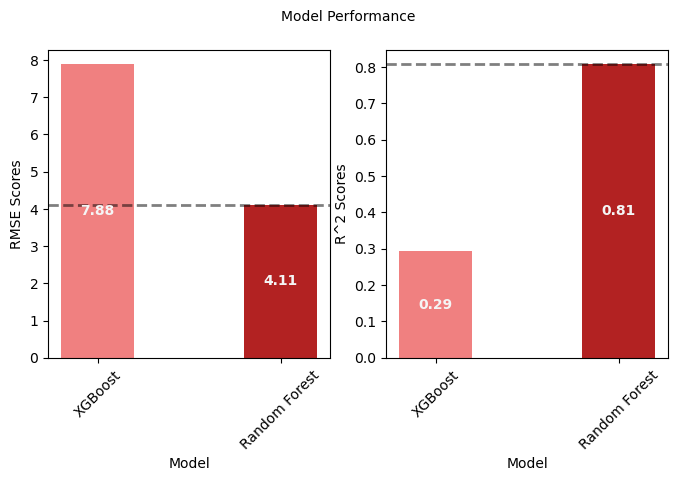

In [57]:
#plot results on test set
fig, ax = plt.subplots(1,2,figsize=(8,4))

ind = np.arange(len(r2_scores)) + 0.3
width = 0.4

for i,score_dict in enumerate([rmse_scores, r2_scores]): 
    scores = list(score_dict.values())

    bars = ax[i].bar(ind, scores, width, color="lightcoral")
    ax[i].bar_label(bars, fmt='%.2f', weight='bold', label_type='center', color='whitesmoke')
    ax[i].patches[scores.index(min(scores)) if i==0 else scores.index(max(scores))].set_facecolor('firebrick')# Highlight with darker color the best result bar
    ax[i].axhline(min(scores) if i==0 else max(scores), ls="--", alpha=0.5, color="black", lw=2) 
    ax[i].set_xticks(ind, labels=score_dict.keys(), fontsize=10, rotation=45)
    ax[i].set_xlabel("Model", fontsize=10)
    ax[i].set_ylabel("RMSE Scores" if i==0 else "R^2 Scores", fontsize=10)

fig.suptitle("Model Performance", fontsize=10)
plt.show()

From the plot above, we can see the random forest regression model, with a lower root mean squared error and higher  coefficient of determination score, performed much better on the dataset than The XGBoost model.

Since random forest models are highly robust to outliers as the results are calculated based on the outputs of multiple decision trees, the selection of random forest model is reasonable.

We calculate the predicted outcome based on the random forest model

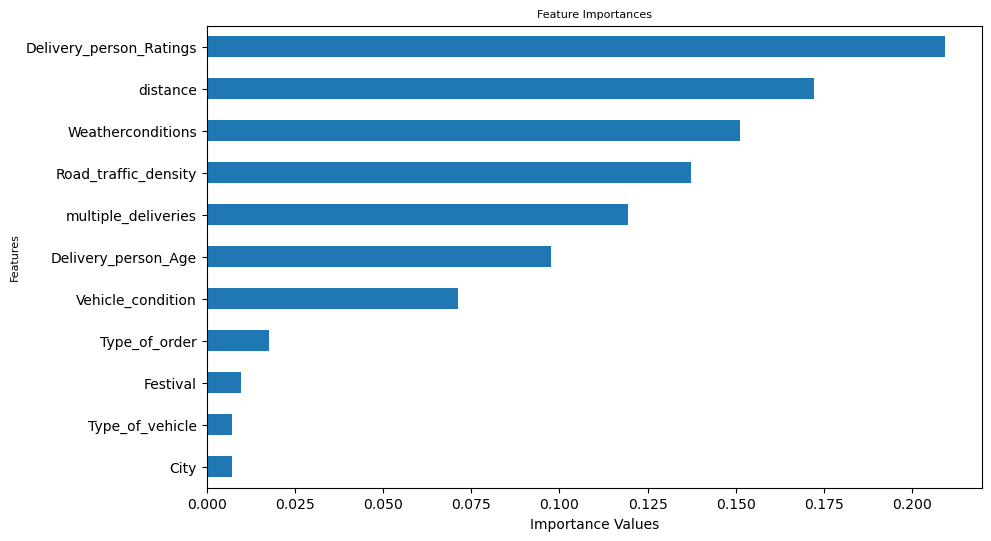

In [58]:
feature_rank=pd.Series(model.feature_importances_,index=Xtrain.columns,name='Importance').sort_values(ascending=True,inplace=False) 
ax=feature_rank.plot(kind='barh',figsize=(10,6))
plt.xlabel("Importance Values", fontsize=10)
plt.ylabel("Features", fontsize=8)
plt.title("Feature Importances", fontsize=8)
plt.show();

What were the 3 most important features to predict delivery time?

In [59]:
forest_3=pd.DataFrame({'Feature_names':X.columns,'Importances':rf.fit(Xtest,ytest).feature_importances_}).sort_values(by='Importances',ascending=False)

In [60]:
forest_3[:3]

,Feature_names,Importances
1,Delivery_person_Ratings,0.203006
2,distance,0.163028
3,Weatherconditions,0.157202


It is time to test the performance of our model by giving inputs to predict the delivery time based on the three most important features so as to see how it can work.

In [61]:
x=data_final[['Delivery_person_Ratings','distance','Weatherconditions']]
y=data_final['delivery_time']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
rf_best3=RandomForestRegressor(n_estimators=100,random_state=10)
rf_best3.fit(x_train,y_train)

RandomForestRegressor(random_state=10)

In [63]:
y_pred_best3=rf_best3.predict(x_test)

In [64]:
print("Delivery Time Prediction")
a = int(input("Average rating of the driver: "))
b = int(input("Weather condition: "))
c = int(input("Total Distance betwen the restaurant and destination address: "))

features = np.array([[a, b,c]])
print("Predicted Delivery Time in Minutes = ", rf_best3.predict(features))

Delivery Time Prediction
Average rating of the driver: 5
Weather condition: 2
Total Distance betwen the restaurant and destination address: 10
Predicted Delivery Time in Minutes =  [21.2270873]


#### 7. Conclusion and Recommendation

- To predict the food delivery time in real time, we calculated the distance between the restaurant  and the customer address. After calcualting the distance between the restaurant and the customer address, we look for relationships between the time taken to deliver the food in the past for the same distance.
- The three most important features in predicting a delivery time for an order are: The driver average ratings, The weather conditions as well as the distance between the restaurant and the pick up location. These variables are most helpful in predicting the outcome variable, 'delivery time'.
- AS expected, The highest rated drivers deliver much quicker than those drivers with a low rating scores
- Younger drivers on average took fewer minutes to deliver than older drivers.
- As expected average delivery time is much shorter during sunny conditions while During Fog and cloudy condition, drivers take longer time to deliver the orders.
- As expected,the delivery time was longer on those orders that were far awar from the city than The urban or metroplitan areas of a city.
- Hiring more  number of drivers with  scooters and electric scooters could be a very good measure as the use of motorcycle during high and jam trafic density time resulted in longer delivery period. 
- The significant difference between the two scooter types and motorcycle in delivery time were also observed in all weather conditions 